In [127]:
import numpy as np
import scipy
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

# Задача 1

Имплементация метода внутренней точки:

In [215]:
def interior_point(f0, f, x0, nu=2, eps=1e-6):
    t = 1
    x = x0
    history = [x0]
    iter_history = []
    while len(f) / t > eps:
        def cur_f(x):
            return t*f0[0](x) - np.sum([np.log(f1[0](x)) for f1 in f])
        def cur_grad(x):
            return t*f0[1](x) - np.sum([f1[1](x) / f1[0](x) for f1 in f], axis=0)
        res = scipy.optimize.fmin(cur_f, x, full_output=True, disp=False)
        x = res[0]
        history.append(x)
        iter_history.append(res[2])
        t *= nu
    return x, np.array(history), np.array(iter_history)

Генерация функций (минимизируемое и ограничения):

In [78]:
m = 6
n = 3

f0 = (lambda x: -np.sum([10**(n-j) * x[j] for j in range(len(x))]), lambda x: -np.array([10**(n-j) for j in range(len(x))]))
f = [(lambda x, z=i: 100**z - 2*np.sum([10**(z - j)*x[j] for j in range(z)]) - x[z] ,\
      lambda x, z=i: -2*np.array([10**(z - j) for j in range(z)] + [0.0]*(n-z))) for i in range(n)] 
f += [(lambda x, z=k: x[z], lambda x, z=i: np.eye(n)[z]) for k in range(n)]

In [128]:
def prepare_data(iter_history):
    y = [[np.log(m*1.0/1.5**k)]*iter_history[k] for k in range(len(iter_history))]
    yn = list(itertools.chain(*y))
    return yn

In [129]:
nu = np.linspace(1.5, 100, 16)
yn = list()
x0 = [0.5]*n
for item in nu:
    x, history, iter_history = interior_point(f0, f, x0, nu=item, eps=1e-10)
    yn.append(prepare_data(iter_history))

C:\Users\rubik\Anaconda\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in log
C:\Users\rubik\Anaconda\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in log


Графики для различных $\mu$:

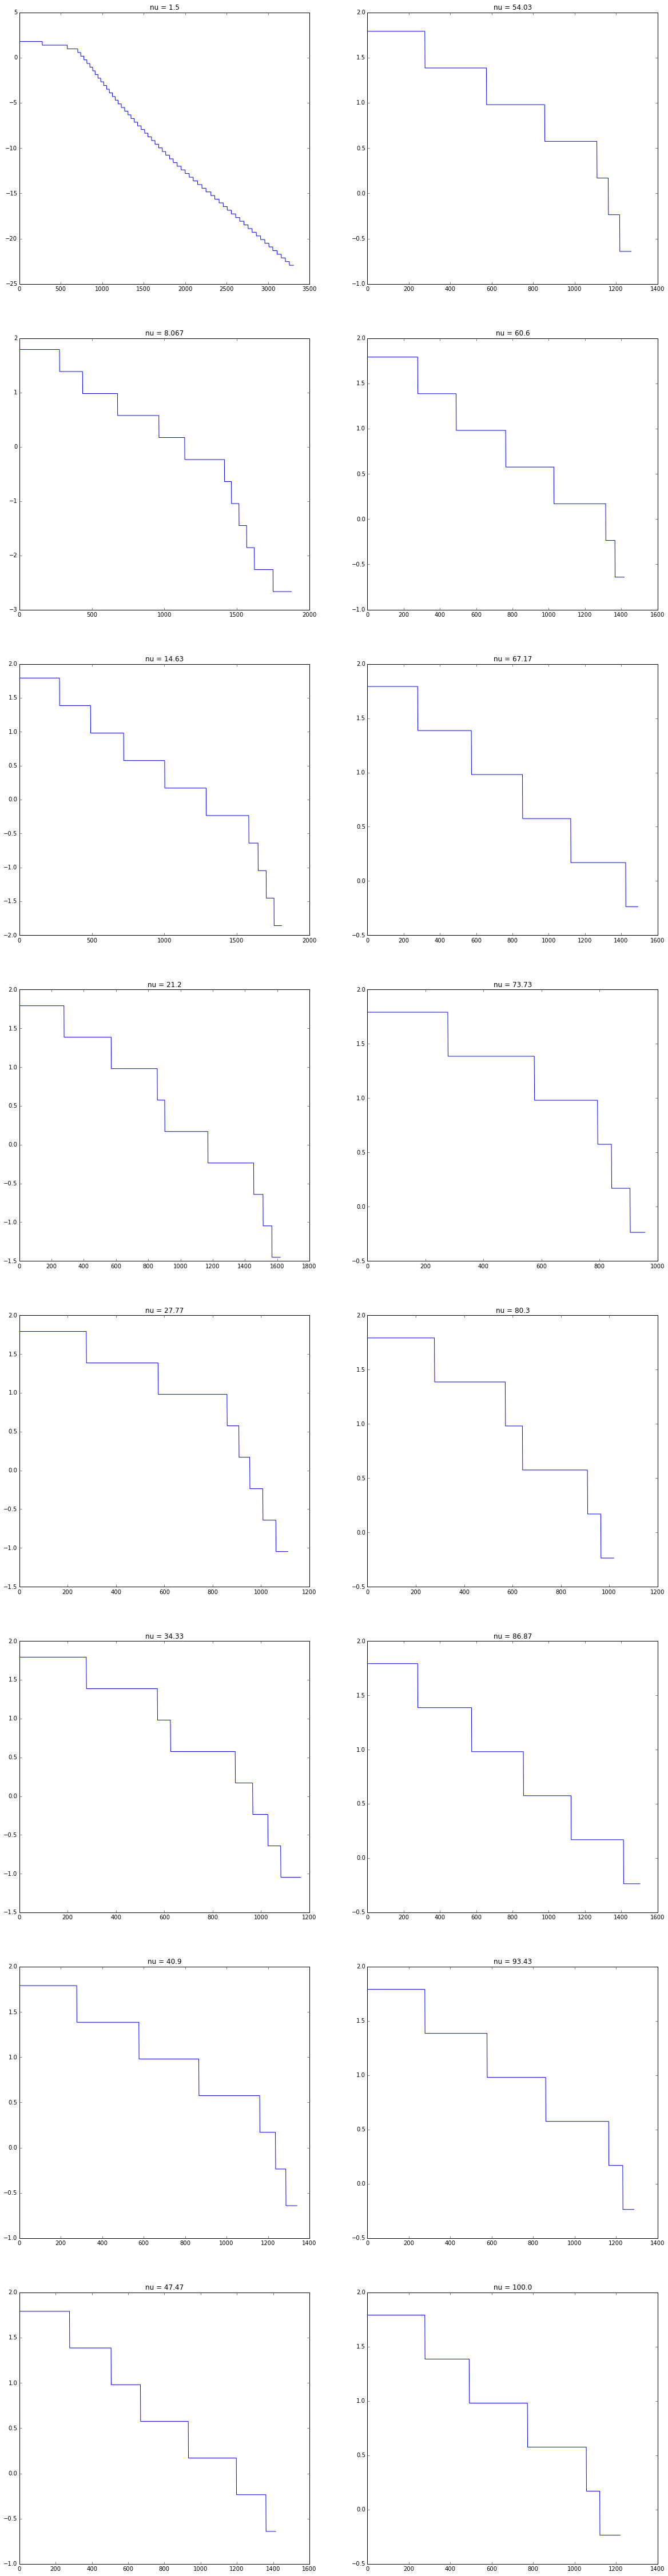

In [144]:
fig, axes = plt.subplots(8, 2, figsize=(20, 80))
for i in range(8):
    axes[i, 0].plot(range(len(yn[i])), yn[i])
    axes[i, 0].set_title('nu = {:.4}'.format(nu[i]))
    axes[i, 1].plot(range(len(yn[8 + i])), yn[8 + i])
    axes[i, 1].set_title('nu = {:.4}'.format(nu[8 + i]))

Графики для разных размерностей задачи:

In [217]:
yn = list()
dif_n = range(2, 101)[::10]
for n in dif_n:
    print n
    f0 = (lambda x: -np.sum([10**(n-j) * x[j] for j in range(len(x))]), lambda x: -np.array([10**(n-j) for j in range(len(x))]))
    f = [(lambda x, z=i: 100**z - 2*np.sum([10**(z - j)*x[j] for j in range(z)]) - x[z] ,\
          lambda x, z=i: -2*np.array([10**(z - j) for j in range(z)] + [0.0]*(n-z))) for i in range(n)] 
    f += [(lambda x, z=k: x[z], lambda x, z=i: np.eye(n)[z]) for k in range(n)]
    x0 = [0.5]*n
    x, history, iter_history = interior_point(f0, f, x0, nu=10, eps=1e-10)
    yn.append(prepare_data(iter_history))

2
12
22
32
42
52
62
72
82
92


C:\Users\rubik\Anaconda\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in log


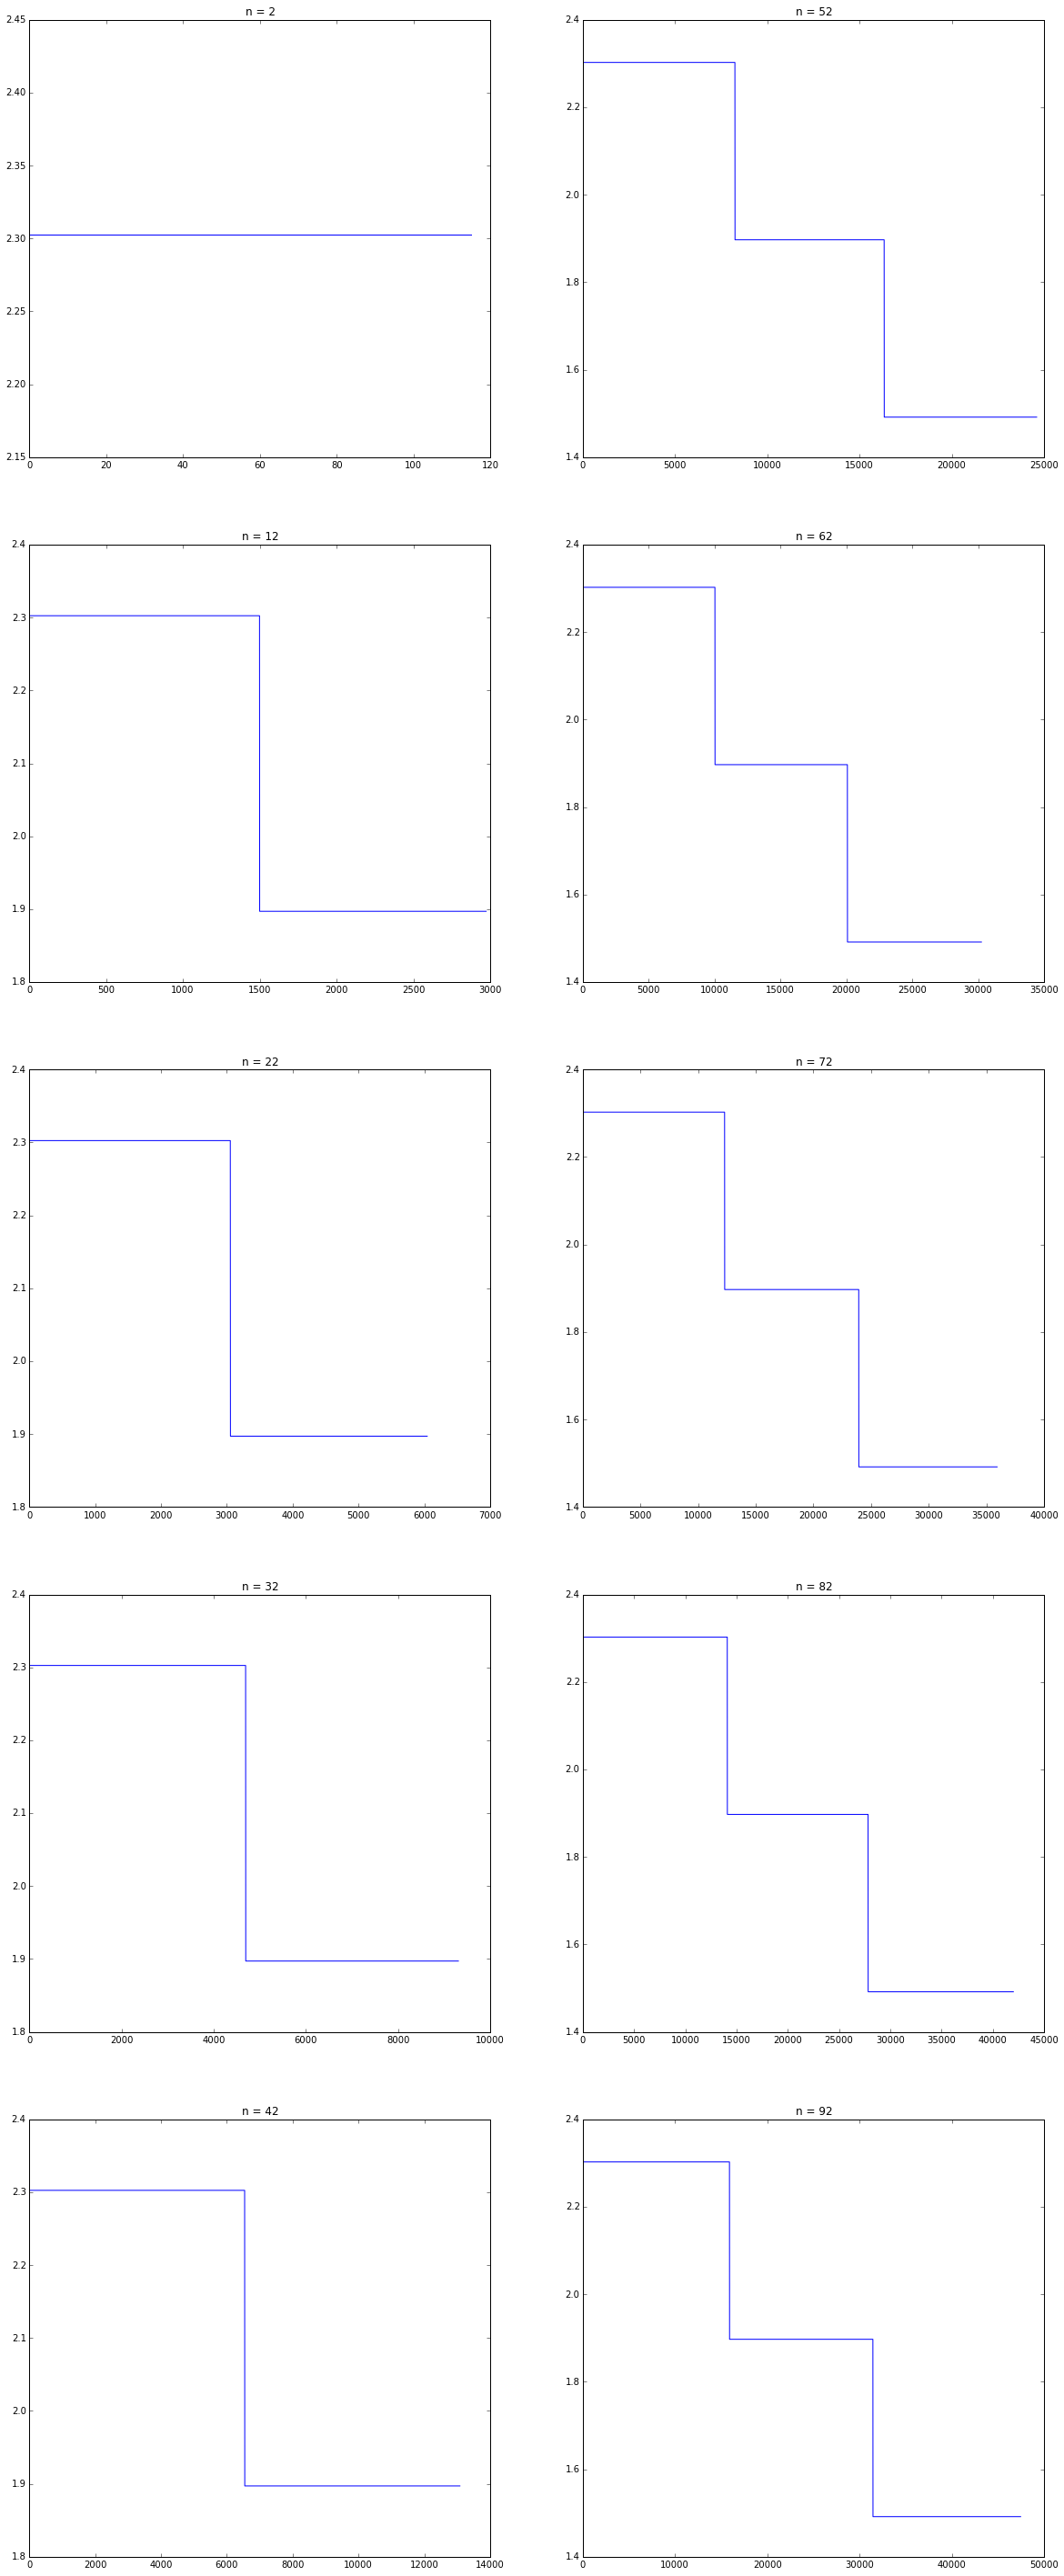

In [222]:
fig, axes = plt.subplots(5, 2, figsize=(20, 50))
for i in range(5):
    axes[i, 0].plot(range(len(yn[i])), yn[i])
    axes[i, 0].set_title('n = {}'.format(dif_n[i]))
    axes[i, 1].plot(range(len(yn[5 + i])), yn[5 + i])
    axes[i, 1].set_title('n = {}'.format(dif_n[5 + i]))

# Задача 2

Решение задачи для $n = 10, m = 10$:

In [197]:
m = 10
n = 10
M = 2*np.random.random((m, m)) - np.ones((m, m))
A0 = -M.dot(M.T) - np.eye(m)
A = list()
for i in range(n):
    M = 2*np.random.random((m/2, m/2)) - np.ones((m/2, m/2))
    M = M + M.T
    A.append(np.array(np.bmat([[M, np.zeros((m/2, m/2))], [np.zeros((m/2, m/2)), -M]])))

In [225]:
def interior_point2(f0, A0, A, x0, nu=2, eps=1e-6):
    t = 1
    x = x0
    history = [x0]
    iter_history = []
    while len(f) / t > eps:
        def cur_f(x):
            cur_A = A0.copy()
            for i in range(len(x)):
                cur_A += x[i]*A[i]
            eig = np.linalg.eigvals(cur_A)
            return t*f0(x) - np.sum([np.log(-ei) for ei in eig])
        res = scipy.optimize.fmin(cur_f, x, full_output=True, disp=False)
        x = res[0]
        history.append(x)
        iter_history.append(res[2])
        t *= nu
    return x, np.array(history), np.array(iter_history)

In [202]:
def f02(x):
    return x[-1]

In [200]:
nu = np.linspace(1.5, 100, 16)
yn2 = list()
for item in nu:
    x, history, iter_history = interior_point2(f02, A0, A, [0.0]*n, nu=item, eps=1e-10)
    yn2.append(prepare_data(iter_history))

C:\Users\rubik\Anaconda\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in log


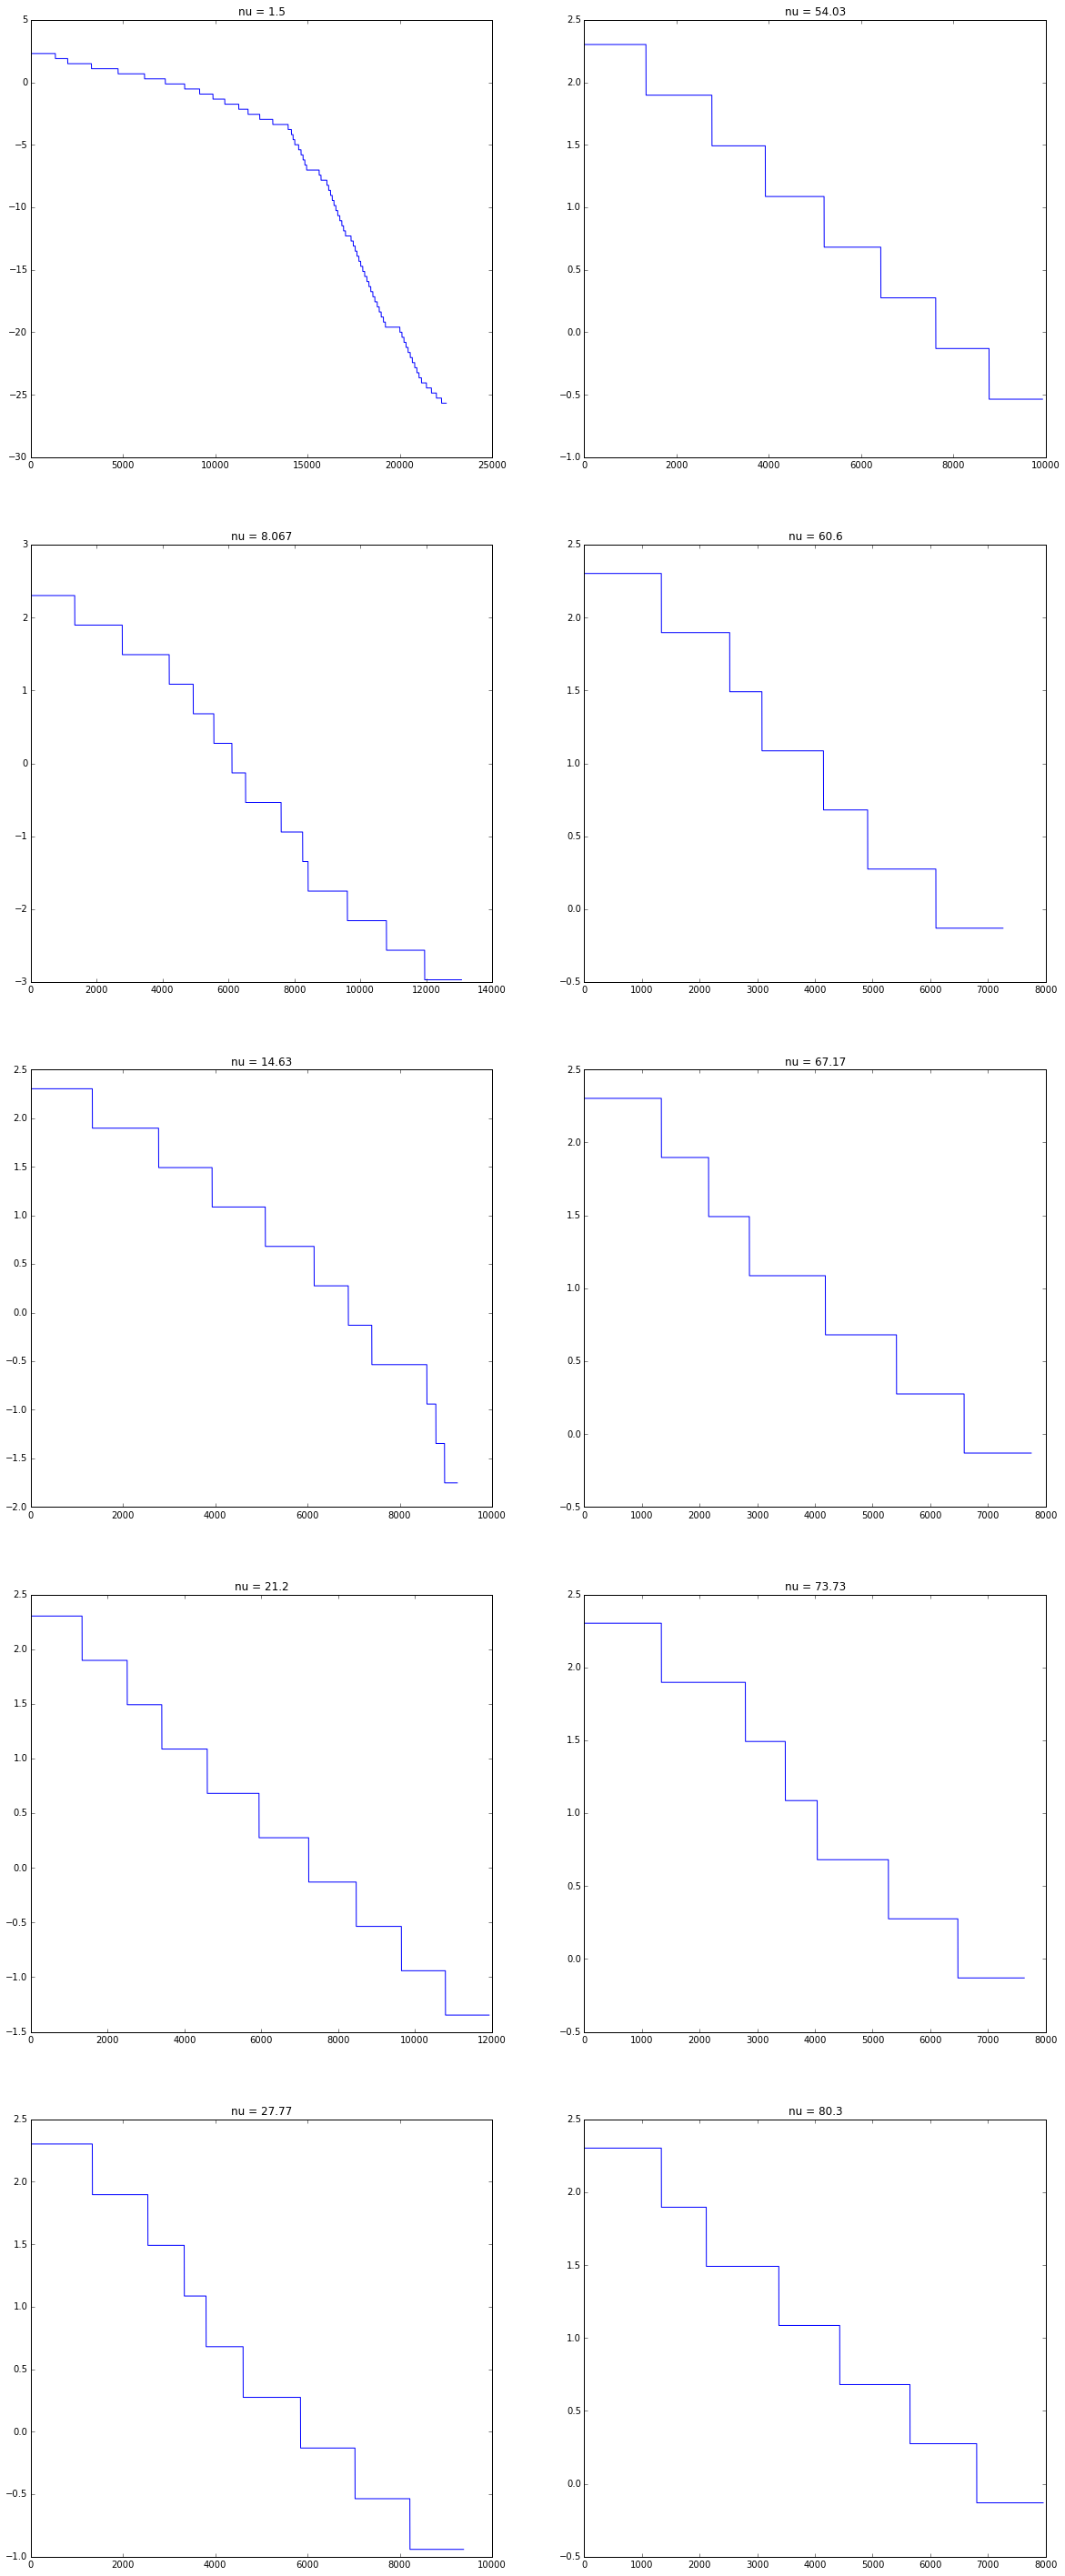

In [223]:
fig, axes = plt.subplots(5, 2, figsize=(20, 50))
for i in range(5):
    axes[i, 0].plot(range(len(yn2[i])), yn2[i])
    axes[i, 0].set_title('nu = {:.4}'.format(nu[i]))
    axes[i, 1].plot(range(len(yn2[8 + i])), yn2[8 + i])
    axes[i, 1].set_title('nu = {:.4}'.format(nu[8 + i]))

Решение задачи для $n = 300, m = 10$:

In [211]:
m = 10
n = 300
M = 2*np.random.random((m, m)) - np.ones((m, m))
A0 = -M.dot(M.T) - np.eye(m)
A = list()
for i in range(n):
    M = 2*np.random.random((m/2, m/2)) - np.ones((m/2, m/2))
    M = M + M.T
    A.append(np.array(np.bmat([[M, np.zeros((m/2, m/2))], [np.zeros((m/2, m/2)), -M]])))

In [226]:
nu = np.linspace(1.5, 100, 16)
yn22 = list()
for item in nu:
    x, history, iter_history = interior_point2(f02, A0, A, [0.0]*n, nu=item, eps=1e-10)
    yn22.append(prepare_data(iter_history))

C:\Users\rubik\Anaconda\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in log


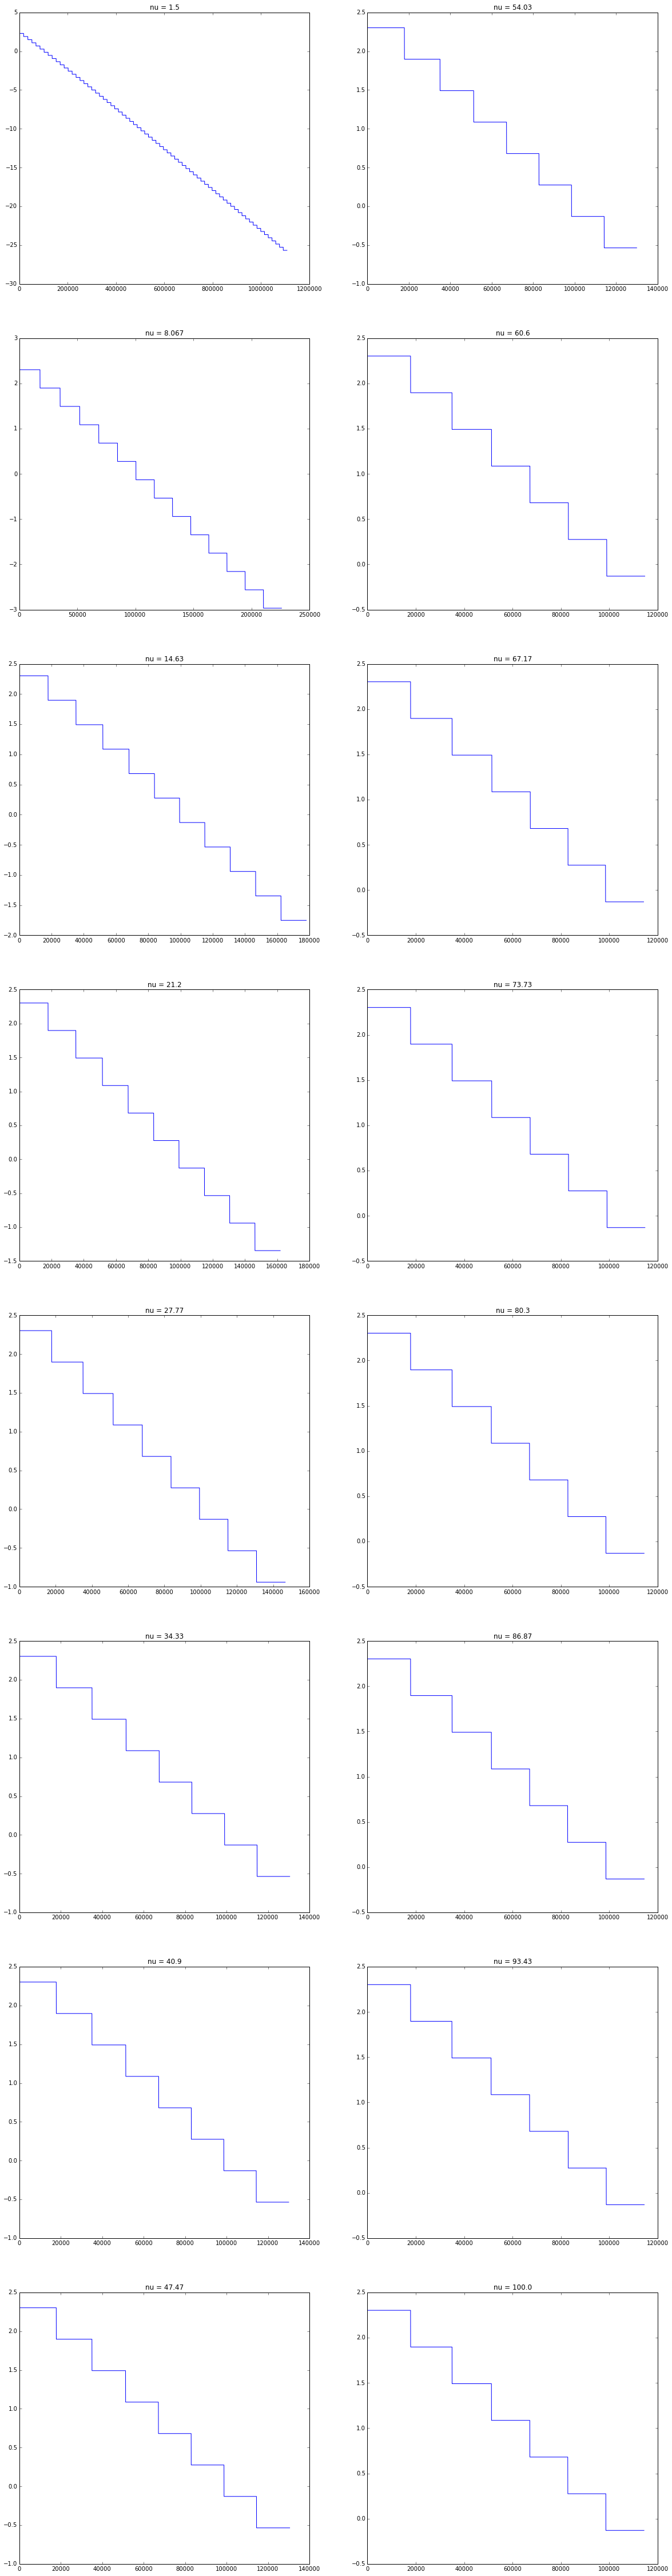

In [228]:
fig, axes = plt.subplots(8, 2, figsize=(20, 80))
for i in range(8):
    axes[i, 0].plot(range(len(yn22[i])), yn22[i])
    axes[i, 0].set_title('nu = {:.4}'.format(nu[i]))
    axes[i, 1].plot(range(len(yn22[8 + i])), yn22[8 + i])
    axes[i, 1].set_title('nu = {:.4}'.format(nu[8 + i]))